# Introduction to Statistical Learning with Applications in Python

This notebook is a Python adaption/translation of Hastie et al. (2009) Introduction to Statistical Learning with Application in R, Chapter 2 Lab.

## Basic Commands

The following commands will import the required modules for our programming endeveours. The <code>numpy</code> module is the fundamental package for scientific computing with Python, <code>random</code> allows us to randomly generate sequences of numbers. The modules are called into the <em>namespace</em> which makes them accessible throughout our program.

In [11]:
import numpy as np
import pandas as pd
import random
import math

### Vectors
The following command instructs Python to string together the numbers 1, 3, 2 and 5, and to save them as a <em>vector</em> named <code>x</code>. More specifically, <code>x</code> is saved as a </code>ndarrray</code> object. When we type <code>print(x)</code>, it will return us back the vector.

In [12]:
x = np.array([1, 3, 2, 5])
print(x)

[1 3 2 5]


Even easier, we could simply create a list object using:

In [13]:
y = [1, 6, 2]
print(y)

[1, 6, 2]


Alternatively, we can use the <code>matrix</code> method to achieve the same. Note that this creates a list of lists object indicated by the double edged brackets.

In [14]:
z = np.matrix('1, 4, 3')
print(z)

[[1 4 3]]


In [15]:
print(y + z)

[[ 2 10  5]]


We can perform simple matrix calculation using the standard calculation operators. However, when trying to enforce a numerical operation on vectors or matrices with non matching dimension, a <code>ValueError</code> is raised.

In [16]:
print(x + z)

ValueError: operands could not be broadcast together with shapes (4,) (1,3) 

In [17]:
x = np.array([1, 6, 2])    # redefine x
print(x + z)

[[ 2 10  5]]


Whit the <code>whos</code> command we can check which variables, modules, function or classes have been called into the namespace.

In [18]:
whos

Variable   Type       Data/Info
-------------------------------
math       module     <module 'math' (built-in)>
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module     <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
random     module     <module 'random' from 'C:<...>aconda3\\lib\\random.py'>
x          ndarray    3: 3 elems, type `int32`, 12 bytes
y          list       n=3
z          matrix     [[1 4 3]]


Using the <code>del</code> command we can delete an object from the namespace.

In [19]:
del x
%whos

Variable   Type      Data/Info
------------------------------
math       module    <module 'math' (built-in)>
np         module    <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module    <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
random     module    <module 'random' from 'C:<...>aconda3\\lib\\random.py'>
y          list      n=3
z          matrix    [[1 4 3]]


We can quickly access an information spreadsheet of a given variables, function, module or class by typing its name followed by a question mark.

In [20]:
z?

### Matrices
There are multiply ways to create a matrix in Python. Note, that the list of list approach combines the list row wise.

In [21]:
x = [[1, 2], [3, 4]]
print(x)

[[1, 2], [3, 4]]


In [22]:
y = np.array([1, 2, 3, 4])
y = np.reshape(y, [2, 2])
print(y)

[[1 2]
 [3 4]]


In [23]:
z = np.matrix('1, 2 ; 3, 4')
print(z)

[[1 2]
 [3 4]]


We can also manipulate the contents of matrix and directly print it. For example, we can apply the square root or power operators by. Note that the power operator will not work on list objects, you should rather use <code>ndarray</code> type structures. However, the <code>sqrt()</code> and <code>square()</code> operators work on all three matrix types.

In [24]:
np.sqrt(x)

array([[ 1.        ,  1.41421356],
       [ 1.73205081,  2.        ]])

In [25]:
y ** 2

array([[ 1,  4],
       [ 9, 16]])

In [26]:
np.square(x)

array([[ 1,  4],
       [ 9, 16]], dtype=int32)

### Random Number Generation
The <code>random.normal</code> method of the <code>numpy</code> modules allows us to generate a vector of random normaly distributed numbers with the first argument being the mean $\mu$, the second being the variance $\sigma^2$ and the third argument being the sample size $n$. We can generate a sequence of 50 standard normal distributed random numbers, that is

$$
x_i \sim N(0, 1)
$$

and 

$$
y_i \sim N(50, 0.1)
$$

In [27]:
mu = 0
sigma = 1

x = np.random.normal(mu, sigma, 50)
y = x + np.random.normal(50, 0.1, 50)
print(x, y)

[-2.13332031 -0.82297913  2.83851742  2.54496211  0.59655598 -1.50071109
  0.44521614  0.74740676  0.45210098  0.37726669 -1.17735006  0.29954234
 -1.37716907 -0.60757392  2.25340789  0.48046557  0.45931668 -0.96770321
  0.88230184  1.18255192  0.30324998 -1.37052668  0.06491424  0.0196664
  0.11322601 -1.07059465 -0.7440163  -1.93747498  0.86185052 -0.30516717
 -0.6212661  -0.17160091 -1.07641267  1.01108727 -0.68440208 -0.44586145
 -0.13767866  0.24029501  1.361847   -0.30477679 -0.41779439  1.01230011
 -0.00533657  0.93192362  1.29810744 -0.45536752 -1.59142034  1.26054381
  1.37107052 -0.66079729] [ 48.00103941  49.08829867  52.81238233  52.7109188   50.5952217
  48.39798483  50.39041308  50.69824272  50.43715891  50.56433027
  48.80538147  50.26010032  48.61351263  49.42824595  52.31169537
  50.50659763  50.43080531  49.06166092  50.90154046  50.98863772
  50.48871127  48.57813787  50.13265704  50.06450903  50.11382444
  48.8503366   49.23675211  48.01866701  50.76493115  49.83239

Above we have created two <code>correlated</code> sets of numbers, <code>x</code> and <code>y</code>, for which we can compute the correlation between them by:

#### Correlation matrix

In [28]:
np.corrcoef(x, y)    # returns the correlation matrix

array([[ 1.        ,  0.99569916],
       [ 0.99569916,  1.        ]])

In [29]:
np.corrcoef(x, y)[0, 1]    # access a specific element of the correlation matrix

0.99569915806543752

#### Seed function
So far, everytime we create a random number sequence the actual numbers within the sequence vary due to being generated anew everytime we call the random number generator. If we want to generate the same sequence of random numbers everytime we execute a programm we would use the <code>random.seed()</code> method. It is good practice to use a seed in order to reproduce the results when working with random numbers.

In [30]:
random.seed(0)

x = np.random.normal(mu, sigma, 100)
y = x + np.random.normal(50, 0.1, 100)

#### Basic statistics
We can compute basic statistic like the mean or the variance using the <code>mean()</code> and <code>var()</code> methods, respectively.

In [31]:
np.mean(y)

50.078274803288686

In [32]:
np.var(y)

0.82168972530551532

In [33]:
np.sqrt(np.var(y))

0.90647102838729232

In [34]:
np.std(y)

0.90647102838729232

## Graphics
Using the <code>matplotlib.pyplot</code> module is the primary way to plot data in Python. 

In [35]:
from mpl_toolkits.mplot3d import axes3d    # required for 3D plots

import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Scatter plots
We can use the <code>plot(x, y)</code> method to create a scatterplot of the numbers in <code>x</code> versus the numbers in <code>y</code>. Moreover, we can pass additional information to the plot like the label axis or the title. We can also save the created output in PDF format using the <code>savefig</code> method. You can also save the plot as JPEG or PNG.

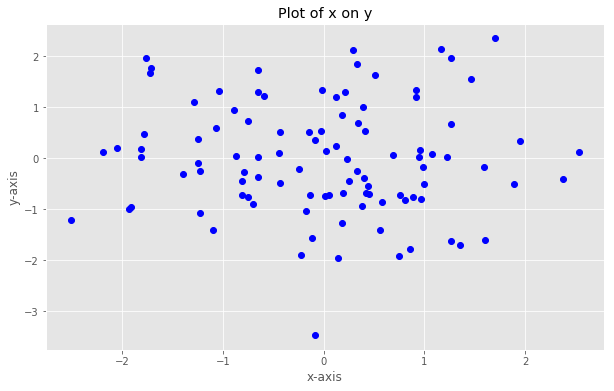

In [36]:
random.seed(100)

x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of x on y')
plt.savefig('figure.pdf')
plt.show()

### Time series plot
The method <code>arange()</code> of the <code>numpy</code> module can be used to create a sequence of ordered numbers. Note that Python always start count at 0.

In [37]:
x = np.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [38]:
y = np.arange(1, 11)
print(y)

[ 1  2  3  4  5  6  7  8  9 10]


If we'd like to create a sequence of equally spaced numbers between two values we can use the <code>numpy.linespace()</code> method, which takes as first two arguments the limiting numbers and as <code>num</code> variable the number of total generated values. Note that this will produce floats.

In [39]:
y = np.linspace(1, 10, num=10)
print(y)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


### Contour plots
A contour plot is a graphical technique for representing a 3-dimensional surface by plotting constant $z$ slices, called contours, on a 2-dimensional format. That is, given a value for $z$, lines are drawn for connecting the $(x, y)$ coordinates where that $z$ value occurs.

We first generate 50 equally spaced values between $-\pi$ and $\pi$. Then we use the <code>numpy.meshgrid</code> method to create a rectangular coordinate grid from the input vectors $x$ and $y$ which is the required input for the <code>matplotlib.pyplot.contour</code> method. The plotting function takes the grid coordinate matrices <code>X</code> and <code>Y</code> and is calcualted by

$$
f(x, y) = \frac{\cos(y)}{(1 + x^2)}
$$

The function takes the arguments <code>contour(x, y, z)</code>.

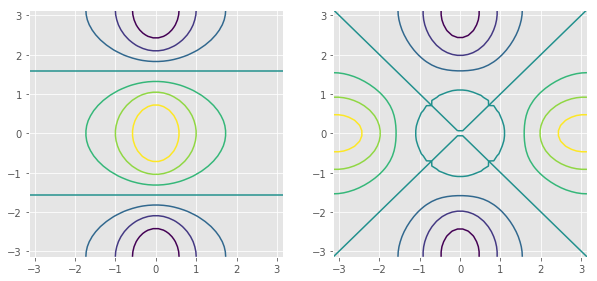

In [40]:
x = np.linspace(-math.pi, math.pi, num=50)
y = x
X, Y = np.meshgrid(x, y)

f = np.cos(Y) / (1 + np.square(X))
fa = (f - f.T)/2    # f.T is the transpose of f

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.contour(X, Y, f)
plt.subplot(222)
plt.contour(X, Y, fa)
plt.show()

### Heatmap
The <code>matplotlib.pyplot.imshow</code> method works the same way as the <code>matplotlib.pyplot.contour</code> method, except that it produces a color-coded plot whos colors depend on th $z$ value. This is known as <em>heatmap</em>.

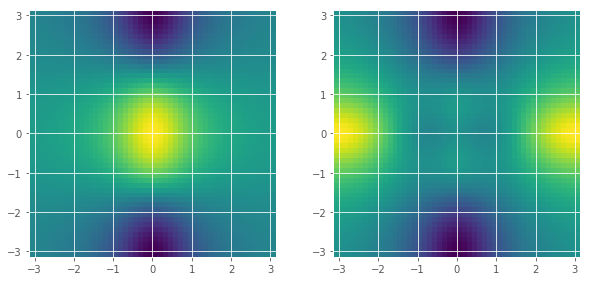

In [41]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(f, extent=(x[0], x[-1], y[0], y[-1]))
plt.subplot(222)
plt.imshow(fa, extent=(x[0], x[-1], y[0], y[-1]))
plt.show()

### 3D plot
Alternatively, to create a three-dimensional plot we can use the following. We first initialize <code>fig</code> as a <code>matplotlib.figure.Figure</code> object and add a <code>Axes3D</code> object to it using the <code>projection='3d'</code> keyword. We then add a 3D surface to the and adjust the coloring with the <code>cmap</code> keyword. Finally we add a legend for the coloring scheme.

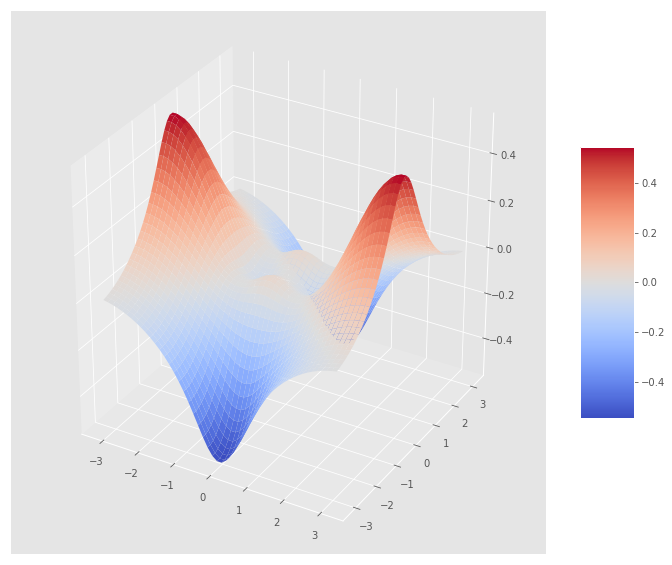

In [42]:
fig = plt.figure(figsize=(12, 10));
ax = fig.add_subplot(111, projection='3d');
surf = ax.plot_surface(X, Y, fa, cmap=cm.coolwarm)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Indexing and accessing data
We often wish to examine parts of a data set. Let our data be stored in the matrix <code>A</code>.

In [43]:
A = np.arange(1, 17, 1).reshape(4, 4).transpose()
print(A)

[[ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]
 [ 4  8 12 16]]


A specific element can be accessed by puting the index of the element next to the matrix variables name like so

In [44]:
A[2, 3]

15

Note, that indexing in Python starts at 0. To retrieve a specific subset of the data from matrix <code>A</code> we can do the following

In [45]:
A[[[0], [2]], [1, 3]]

array([[ 5, 13],
       [ 7, 15]])

In [46]:
A[0:3, 1:4]

array([[ 5,  9, 13],
       [ 6, 10, 14],
       [ 7, 11, 15]])

Using the <code>:</code> operator allows us to select a series from a value to another value. Using only the <code>:</code> operator with no additional value next to it will retrieve the complete row or column.

In [47]:
A[:2, :]

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14]])

# Importing data

<code>pandas</code> is an open source Python library providing high-performance, intuitive data structures and data analysis tools. It aims to be the fundamental high-level building block for doing pratical, real world data analysis in Python.

<code>pandas</code> is well suited for different kinds of data:
<ul>
<li>Tabular data (Excel spreadsheets and SQL tables)</li>
<li>Ordered and unordered time series data</li>
<li>Arbitrary matrix data with row and column labels</li>
</ul>

The two primary data structures are <code>Series</code> (1-dimensional) and <code>DataFrames</code> (2-dimensional). They sufffice to handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. 

In [48]:
import pandas as pd

We can import data using the <code>pandas.read_csv</code> method which will put the loaded data into a <code>DataFrame</code> object.

In [49]:
data = pd.read_csv('data/Auto.csv', header=0, na_values='?')

### Selection

The <code>pandas.iloc</code> selection allows for integer-location based indexing selection by position. Not that indexing start at 0 in Python.

In [50]:
data.iloc[32]

mpg                     25
cylinders                4
displacement            98
horsepower             NaN
weight                2046
acceleration            19
year                    71
origin                   1
name            ford pinto
Name: 32, dtype: object

A specific value in the <code>DataFrame</code> object can be accessed by first entering the column header and then the row index.

In [51]:
data['horsepower'][32]

nan

### Slicing

The dimension of a <code>DataFrame</code> can be assessed using

In [52]:
data.shape

(397, 9)

Subsets and slices of a <code>DataFrame</code> can be retrieved by the following

In [53]:
data[:4]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst


In [54]:
data.iloc[:4, :2]

,mpg,cylinders
0,18.0,8
1,15.0,8
2,18.0,8
3,16.0,8


By using the <code>list</code> command on the <code>DataFrame</code> we can return the data frame's column headers

In [56]:
list(data)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

Some methods can be used in direct succession like this

In [65]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

It is important to note that Python evaluates from right to left. For this example the <code>sum</code> method is applied to the <code>data.isnull()</code> data frame, which is a table filled with <code>True</code> and <code>False</code>. <code>sum</code> thus, return the total number of <code>True</code> per column header for the data frame. The result indicates that there are 5 mising values, NaNs, int he data set.

The missing values can be excluded from the data set by overriding the <code>data</code> variable

In [67]:
data = data.dropna()
data.shape

(392, 9)